# Final Project: Quantum Dot Eigenstates

Quantum dots can be effectively viewed as a finite square well system.  Therefore, the Schrodinger equation will be solved for the classic finite square well, a problem that has been studied in depth.  Two different codes will be used to solve this system and the resulting eigenstates will be compared.  The primary makeup of these codes are the same but there are two functions that can be changed for testing: root finding and ODE solving.  In the first code, a bisection method and scipy.integrate.odeint are used for root finding and ODE solving, respectively.  In the second code, scipy.optimize.brentq and scipy.integrate.odeint are used.  Both of these methods are compared to each other and to the analytical solution at the end.

In [1]:
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
from SchrodingerSolver_scipy import Finite_Well_Scipy_Solver
from SchrodingerSolver_user import Finite_Well_Solver

plt.rcParams['figure.dpi'] = 125

### Define Constants

In [2]:
N = 1000                    # number of points to take
psi = np.zeros([N,2])       # Wavefunction values and its derivative (psi and psi')
psi0 = array([0,1])         # Wavefunction initial states
Vo = 20
E = 0.0                     # global variable Energy  needed for Sch.Eq, changed in function "Wave function"
b = 2                       # point outside of well where we need to check if the function diverges
x = linspace(-b, b, N)      # x-axis
en = linspace(0, Vo, 1000)  # vector of energies where we look for the stable states
L = 1

## Bisection Method

### Initialize Finite Well Solver Class

In [3]:
s = Finite_Well_Solver(x, b, L, Vo, en, psi, psi0)

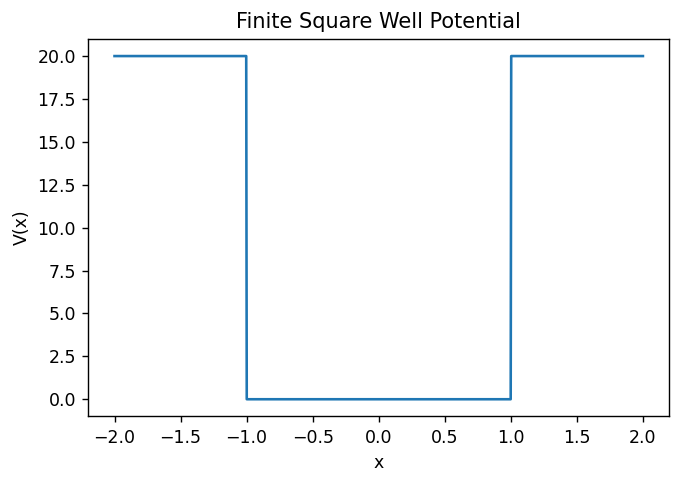

In [4]:
plt.figure(3)
pot = []
for i in x:
    pot.append(s.V_func(i))
plt.plot(s.x,pot)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Finite Square Well Potential')
plt.show()

In [5]:
psi_b = []    # vector of wave function at x = b for all of the energies in en

for e1 in en:
    psi_b.append(s.Wave_function(e1))     # for each energy e1 find the the psi(x) at x = b
E_zeroes = s.find_all_zeroes(en, psi_b)   # now find the energies where psi(b) = 0 

In [6]:
print ("Energies for the bound states are: ")
for i in range(0,len(E_zeroes)):
    print("%1.4f" %(E_zeroes[i][0]));

s.find_analytic_energies();

Energies for the bound states are: 
0.9179
3.6462
8.0923
14.0059
Energies from the analytical model are: 
(Symmetrical case)
0.9179
8.0922
19.9726
(Antisymmetrical case)
3.6462
14.0022


/results/qd-final20/SchrodingerSolver_user.py:117: RuntimeWarning: divide by zero encountered in true_divide
  f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.138, symmetrical case
/results/qd-final20/SchrodingerSolver_user.py:118: RuntimeWarning: divide by zero encountered in true_divide
  f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case


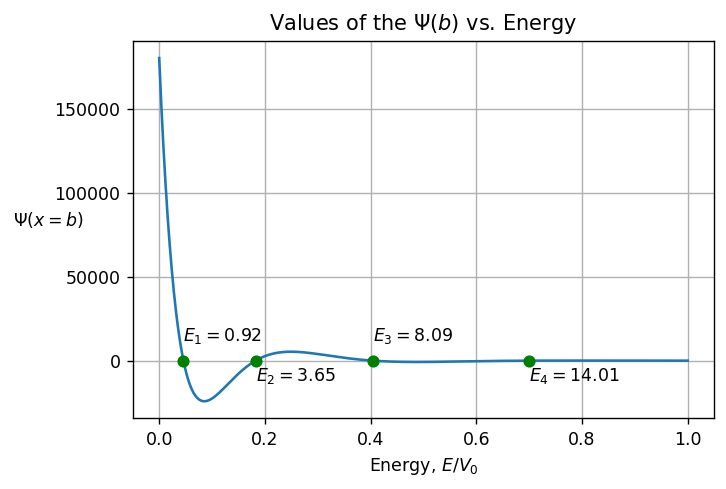

In [7]:
plt.figure()
plt.plot(en/Vo,psi_b)
plt.title('Values of the $\Psi(b)$ vs. Energy')
plt.xlabel('Energy, $E/V_0$')
plt.ylabel('$\Psi(x = b)$', rotation='horizontal')
i=1
for i in range(0,len(E_zeroes)):
    plt.plot((E_zeroes[i][0])/Vo, [0], 'go')
    plt.annotate("$E_%d = %.2f$"%(i+1,(E_zeroes[i][0])), xy = (((E_zeroes[i][0])/Vo), 0), xytext=((E_zeroes[i][0])/Vo, 12000*(-1)**(i)))
    i += 1
plt.grid()

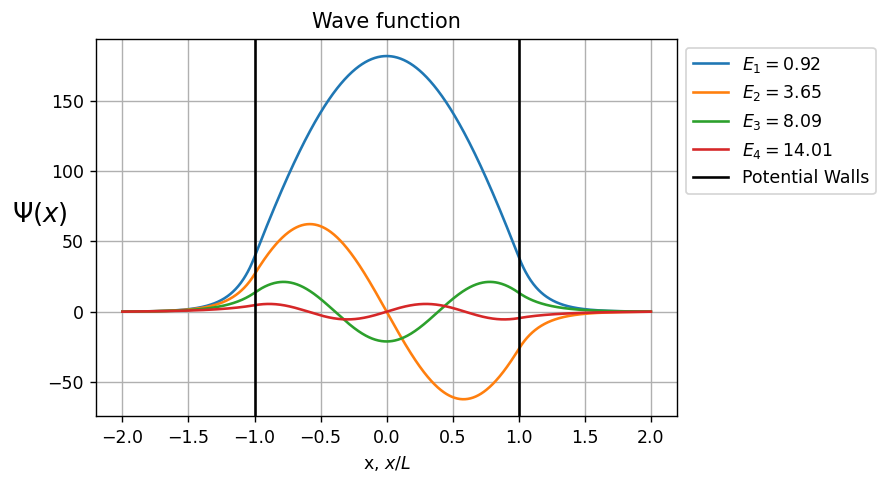

In [8]:
plt.figure(2)

for i in range(0,len(E_zeroes)):
    psi = s.Wave_function_full(E_zeroes[i][0])
    plt.plot(x, psi[:,0], label="$E_%d = %.2f$"%(i+1, E_zeroes[i][0]))
plt.axvline(x=L,color ='k',label='Potential Walls')
plt.axvline(x=-L,color='k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
plt.grid()

## Use Libraries

Here we repeat the previous calculations but instead of using the bisection method, as above, the function *scipy.optimize.brentq()* was used for root finding.

### Initialize Finite Well Solver Class

In [9]:
s_scip = Finite_Well_Scipy_Solver(x, b, L, Vo, en, psi, psi0)

### Find Energies Corresponding to $\Psi \left( b \right)$

In [10]:
psi_b_s = []    # vector of wave function at x = b for all of the energies in en

for e1 in en:
    psi_b_s.append(s_scip.Wave_function(e1))     # for each energy e1 find the the psi(x) at x = b
E_zeroes_s = s_scip.find_all_zeroes(en, psi_b)   # now find the energies where psi(b) = 0 

### Compare Energies from Scipy.Integrate and Analytical Methods

In [11]:
print ("Energies for the bound states are: ")
for E in E_zeroes_s:
    print("%.4f" %E);

E_n = s_scip.find_analytic_energies();

Energies for the bound states are: 
0.9179
3.6462
8.0923
14.0059
Energies from the analytical model are: 
(Symmetrical case)
0.9179
8.0922
19.9726
(Antisymmetrical case)
3.6462
14.0022


/results/qd-final20/SchrodingerSolver_scipy.py:75: RuntimeWarning: divide by zero encountered in true_divide
  f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.138, symmetrical case
/results/qd-final20/SchrodingerSolver_scipy.py:76: RuntimeWarning: divide by zero encountered in true_divide
  f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case


### Plot Wavefunction at b vs Energy Vector

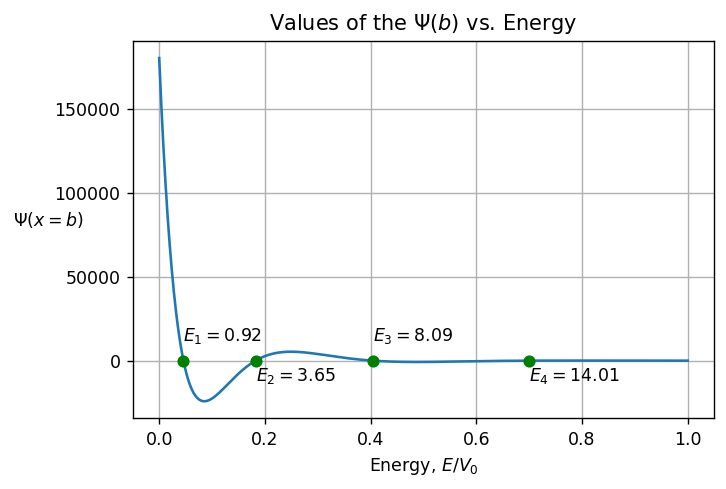

In [12]:
plt.figure()
plt.plot(en/Vo,psi_b)
plt.title('Values of the $\Psi(b)$ vs. Energy')
plt.xlabel('Energy, $E/V_0$')
plt.ylabel('$\Psi(x = b)$', rotation='horizontal')
i=1
for E in E_zeroes_s:
    plt.plot(E/Vo, [0], 'go')
    plt.annotate("$E_%d = %.2f$"%(i,E), xy = ((E/Vo), 0), xytext=(E/Vo, 12000*(-1)**(i+1)))
    i += 1
plt.grid()

### Plot the Wavefunctions for First 4 Eigenstates

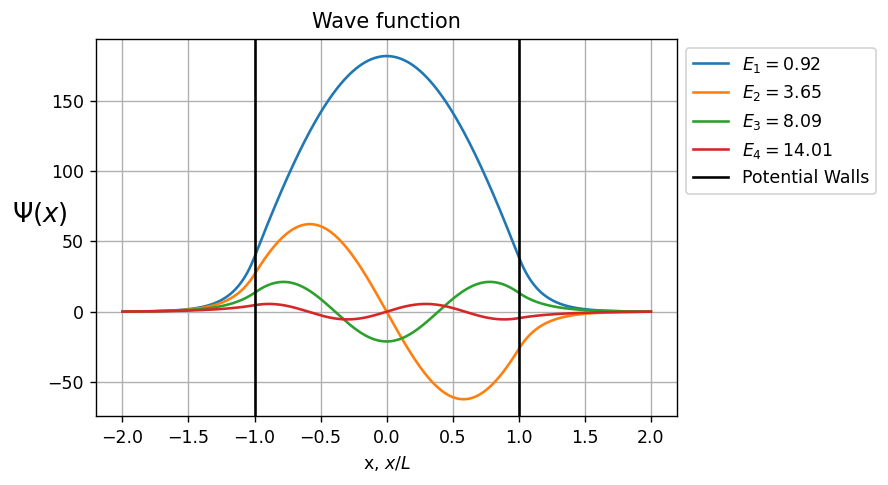

In [13]:
plt.figure(2)
i = 1
for E in E_zeroes_s:
    psi = s_scip.Wave_function_full(E)
    plt.plot(x, psi[:,0], label="$E_%d = %.2f$"%(i, E))
    i += 1 
plt.axvline(x=L,color ='k',label='Potential Walls')
plt.axvline(x=-L,color='k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Wave function')
plt.xlabel('x, $x/L$')
plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
plt.grid()

## Compare Results

In [14]:
E_act = [E_n[0][0], E_n[1][0], E_n[0][1], E_n[1][1]]

In [15]:
print("\033[4mE_n\tBisection\tScipy\t\tActual\t\tError (Bisection)\tError (Scipy)\033[0m")
for i in range(0,len(E_zeroes)):
    error_1 = abs((E_act[i] - E_zeroes[i][0])/E_zeroes[i][0])
    error_2 = abs((E_act[i] - E_zeroes_s[i])/E_zeroes_s[i])
    print("E_%d \t%1.8f\t%1.8f\t%1.8f\t%1.8f\t\t%1.8f" %(i+1, E_zeroes[i][0], E_zeroes_s[i], E_act[i], error_1, error_2));

E_n	Bisection	Scipy		Actual		Error (Bisection)	Error (Scipy)
E_1 	0.91787252	0.91787260	0.91787048	0.00000223		0.00000231
E_2 	3.64621977	3.64621993	3.64620079	0.00000521		0.00000525
E_3 	8.09233947	8.09233974	8.09215055	0.00002335		0.00002338
E_4 	14.00586102	14.00586071	14.00216028	0.00026423		0.00026421


### Comments

Using the bisection method instead of *scipy.optimize.brentq()* improves the accuracy of the solution 